In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from qutip import Bloch, Qobj, basis, expect, mesolve, sigmam, sigmap, sigmax, sigmaz

%matplotlib inline

# Figure 1

## Figure 1c

In [2]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
# omega_d = ?  # drive frequency
# omega_q = ?  # transition frequency between |e> and |f> levels
# J = gamma_e / 4  # coupling strength?
# Delta = 0  # detuning

In [3]:
J_list = np.linspace(0, 8, num=100)
Delta_list = np.linspace(-4, 4, num=100)
J_grid, Delta_grid = np.meshgrid(J_list, Delta_list)
dlambda_grid = np.zeros(J_grid.shape, dtype=complex)

for J_idx, J in enumerate(J_list):
    for Delta_idx, Delta in enumerate(Delta_list):
        Delta *= 2 * np.pi
        
        # effective Hamiltonian
        H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])

        lambda_m, lambda_p = H_eff.eigenenergies()
        dlambda = lambda_p - lambda_m
        dlambda_grid[Delta_idx, J_idx] = dlambda

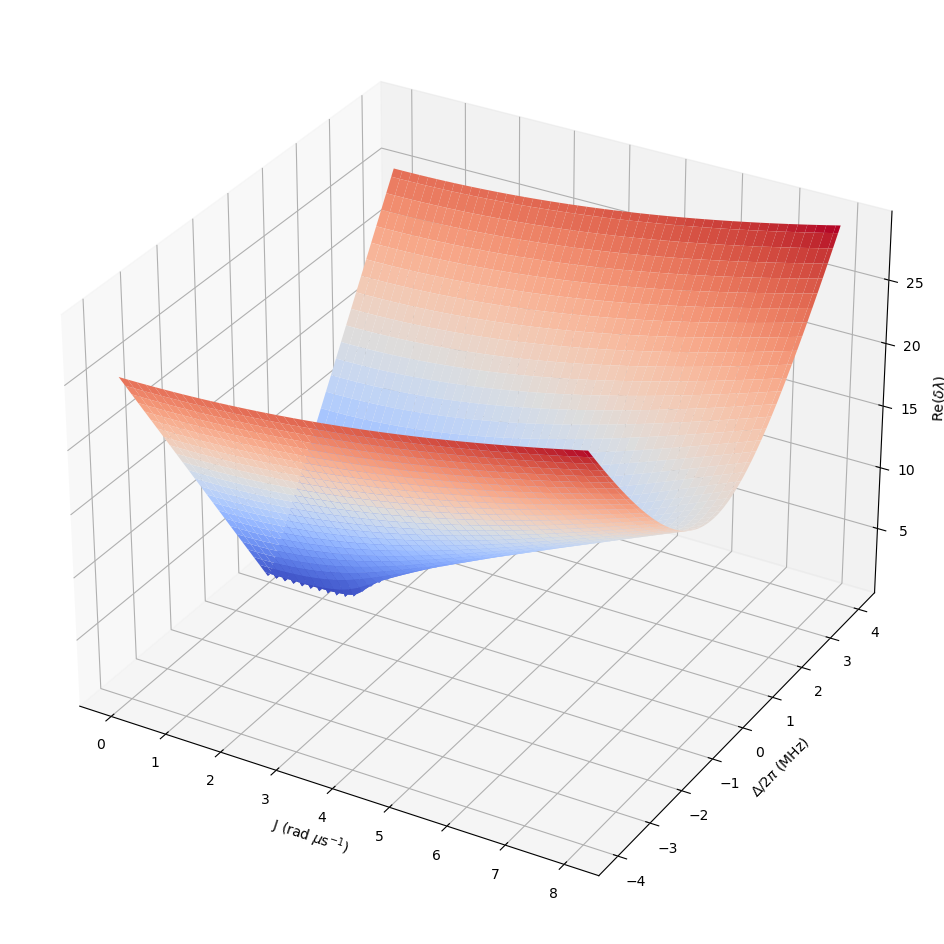

In [4]:
### Figure 1c ###

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "3d"})

surf = ax.plot_surface(J_grid, Delta_grid, dlambda_grid.real, cmap=cm.coolwarm)
ax.set_xlabel('J (rad $\mu\mathrm{s}^{-1}$)')
ax.set_ylabel('$\Delta / 2\pi$ (MHz)')
ax.set_zlabel('Re($\delta\lambda$)');

## Figure 1d

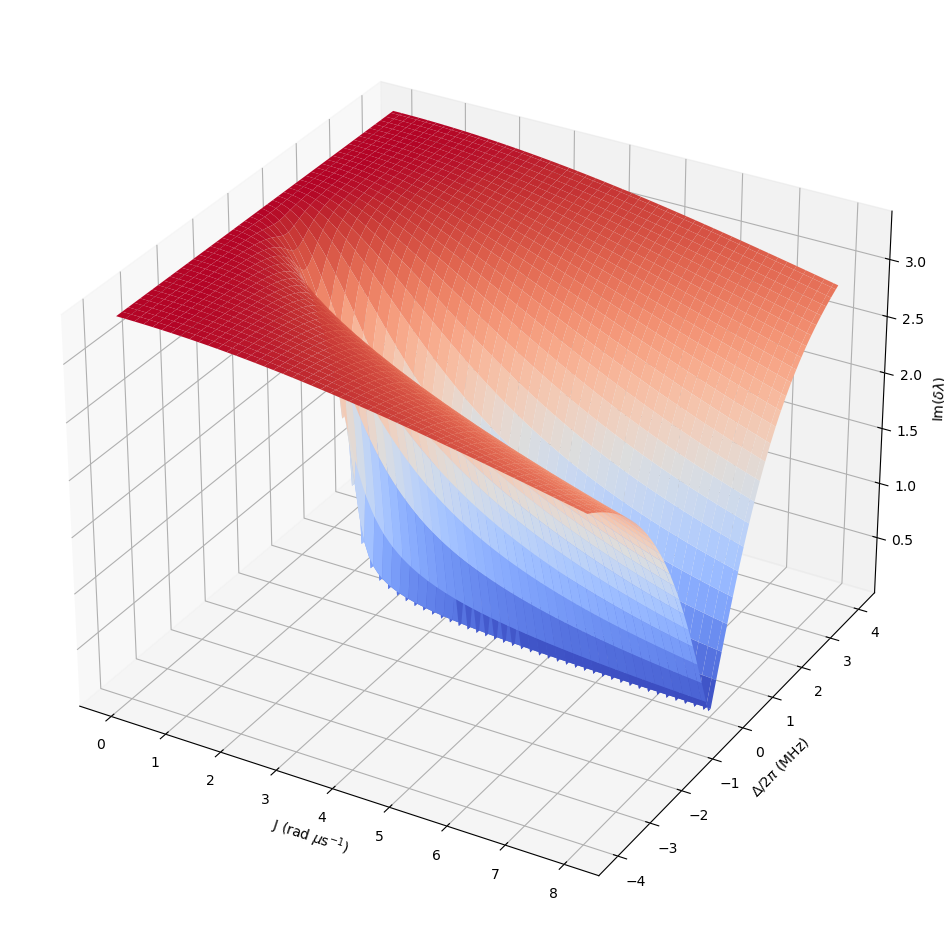

In [5]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "3d"})

surf = ax.plot_surface(J_grid, Delta_grid, np.abs(dlambda_grid.imag), cmap=cm.coolwarm)
ax.set_xlabel(r'J (rad $\mu\mathrm{s}^{-1}$)')
ax.set_ylabel(r'$\Delta / 2\pi$ (MHz)')
ax.set_zlabel(r'Im($\delta\lambda$)');

# Figure 2

## Figure 2a

In [51]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
Delta = 0  # detuning

In [52]:
J_list = np.linspace(0, 20, num=101)
t_list = np.linspace(0, 2, num=101)
t_grid, J_grid = np.meshgrid(t_list, J_list)
Pfn_grid = np.zeros_like(J_grid)

psi0 = basis(2, 1)  # initialize in |f>

for J_idx, J in enumerate(J_list):
    # effective Hamiltonian
    H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])
    
    out = mesolve(H_eff, psi0, t_list, e_ops=[sigmaz()])
    Pfn_grid[J_idx, :] = 1 - out.expect[0]

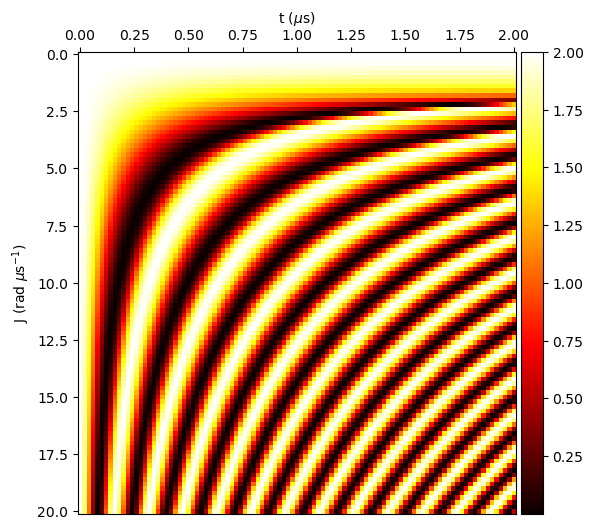

In [70]:
fig, ax = plt.subplots(figsize=(6,6))
fig.gca().invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
im = ax.pcolormesh(t_grid, J_grid, Pfn_grid, cmap='hot')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)
ax.set_xlabel(r't ($\mu\mathrm{s}$)')
ax.set_ylabel(r'J (rad $\mu\mathrm{s}^{-1}$)');

## Figure 2b

In [77]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
Delta = 0  # detuning

In [78]:
J_list = np.linspace(0, 5, num=101)
t_list = np.linspace(0, 2, num=101)
t_grid, J_grid = np.meshgrid(t_list, J_list)
Pfn_grid = np.zeros_like(J_grid)

psi0 = basis(2, 1)  # initialize in |f>

for J_idx, J in enumerate(J_list):
    # effective Hamiltonian
    H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])
    
    out = mesolve(H_eff, psi0, t_list, e_ops=[sigmaz()])
    Pfn_grid[J_idx, :] = 1 - out.expect[0]

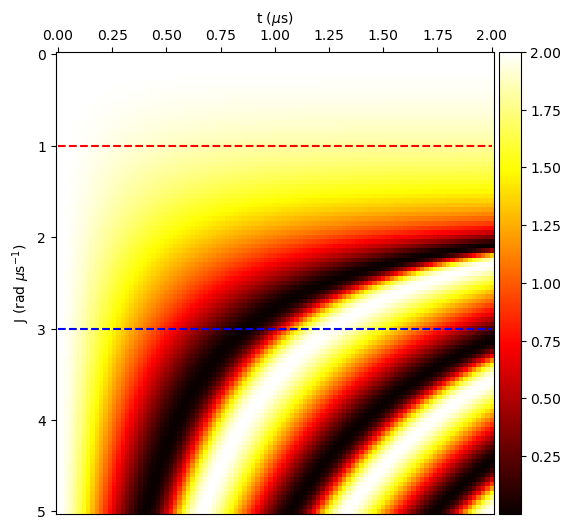

In [85]:
fig, ax = plt.subplots(figsize=(6,6))
fig.gca().invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax.plot(t_list, np.ones_like(t_list), 'r--')
ax.plot(t_list, 3 * np.ones_like(t_list), 'b--')

im = ax.pcolormesh(t_grid, J_grid, Pfn_grid, cmap='hot')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)

ax.set_xlabel(r't ($\mu\mathrm{s}$)')
ax.set_ylabel(r'J (rad $\mu\mathrm{s}^{-1}$)');

## Figure 2c

In [3]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0  # decay rate to |e>
Delta = 0  # detuning

In [4]:
J_list = [1, 3]
t_list = np.linspace(0, 2, num=101)
t_grid, J_grid = np.meshgrid(t_list, J_list)
Pg_grid = np.zeros(J_grid.shape)
Pe_grid = np.zeros(J_grid.shape)
Pf_grid = np.zeros(J_grid.shape)
Pn_grid = np.zeros(J_grid.shape)

psi0 = basis(3, 2)

for J_idx, J in enumerate(J_list):
    H = J * Qobj([[0,0,0],[0,0,1],[0,1,0]]) + Delta / 2 * Qobj([[0,0,0],[0,1,0],[0,0,-1]])
    
    result = mesolve(
        H, 
        psi0, 
        t_list, 
        c_ops=[
            np.sqrt(gamma_e)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), 
            np.sqrt(gamma_f)*Qobj([[0,0,0],[0,0,1],[0,0,0]])
        ], 
        e_ops=[],
    )
    
    Pg_grid[J_idx,:] = expect(Qobj([[1,0,0],[0,0,0],[0,0,0]]), result.states)
    Pe_grid[J_idx,:] = expect(Qobj([[0,0,0],[0,1,0],[0,0,0]]), result.states)
    Pf_grid[J_idx,:] = expect(Qobj([[0,0,0],[0,0,0],[0,0,1]]), result.states)
    Pn_grid[J_idx,:] = expect(Qobj([[0,0,0],[0,1,0],[0,0,1]]), result.states)

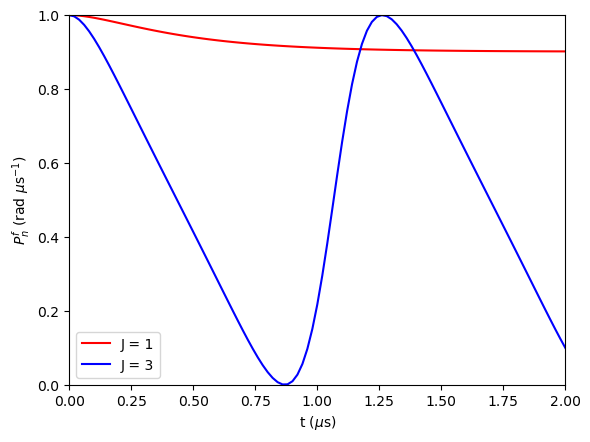

In [15]:
plt.plot(t_list, Pf_grid[0, :] / Pn_grid[0, :], 'r', label='J = 1')
plt.plot(t_list, Pf_grid[1, :] / Pn_grid[1, :], 'b', label='J = 3')
plt.axis([t_list[0], t_list[-1], 0, 1])
plt.xlabel(r't ($\mu\mathrm{s}$)')
plt.ylabel(r'$P^f_n$ (rad $\mu\mathrm{s}^{-1}$)')
plt.legend();

## Figure 2d

In [31]:
# constants
gamma_e = 1.61 * 4  # occupation-number loss rate to |g>
gamma_f = 0  # decay rate to |e>
Delta = 0  # detuning

In [32]:
J = np.linspace(0, 5, num=101)

Dlambda_real = np.real(np.sqrt(4 * J**2 + (Delta - 1j * gamma_e / 2)**2))

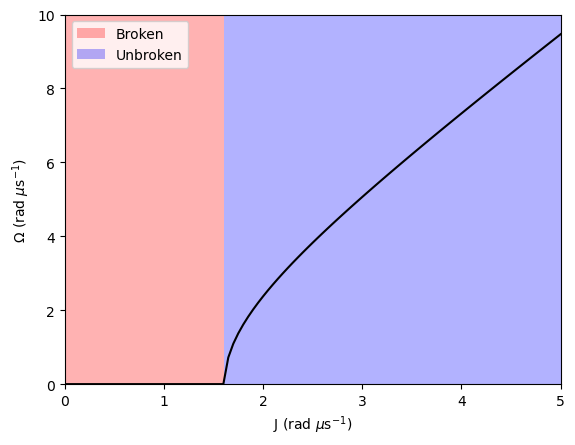

In [33]:
plt.plot(J, Dlambda_real, 'k')
plt.axis([J[0], J[-1], 0, 10])
plt.axvspan(0, gamma_e / 4, facecolor='r', alpha=0.3, label='Broken')
plt.axvspan(gamma_e / 4, J[-1], facecolor='b', alpha=0.3, label='Unbroken')
plt.xlabel(r'J (rad $\mu\mathrm{s}^{-1}$)')
plt.ylabel(r'$\Omega$ (rad $\mu\mathrm{s}^{-1}$)')
plt.legend();

## Figure 2e

In [35]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
gamma = gamma_e - gamma_f
Delta = 0  # detuning
Jt = 0.4 * gamma

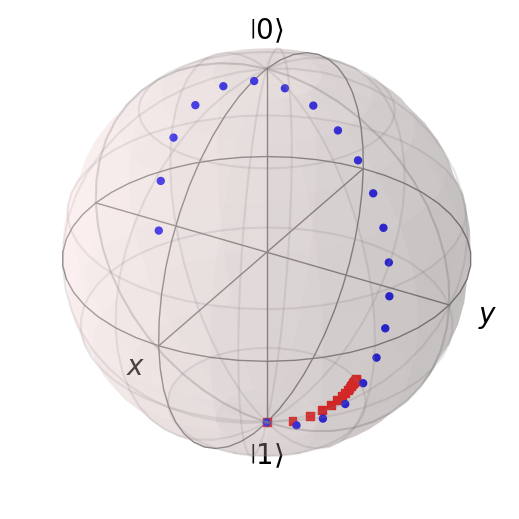

In [39]:
b = Bloch()

### J = gamma ###

J = gamma
t_list = np.linspace(0, Jt / J, num=21)

psi0 = basis(3, 2)
H = J * Qobj([[0,0,0],[0,0,1],[0,1,0]]) + Delta * Qobj([[0,0,0],[0,1,0],[0,0,0]])

result = mesolve(
    H, 
    psi0, 
    t_list, 
    c_ops=[
        np.sqrt(gamma_e) * Qobj([[0,1,0],[0,0,0],[0,0,0]]), 
        np.sqrt(gamma_f) * Qobj([[0,0,0],[0,0,1],[0,0,0]])
    ],
    e_ops=[
        Qobj([[0,0,0],[0,1,0],[0,0,1]]), 
        Qobj([[0,0,0],[0,0,1],[0,1,0]]), 
        np.sqrt(2) * Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),
        Qobj([[0,0,0],[0,1,0],[0,0,-1]])
    ]
)
b.add_points([
    result.expect[1] / result.expect[0],
    result.expect[2] / result.expect[0],
    result.expect[3] / result.expect[0]
])

### J = gamma / 5 ###

J = gamma / 5
t_list = np.linspace(0, Jt / J, num=21)

psi0 = basis(3, 2)
H = J * Qobj([[0,0,0],[0,0,1],[0,1,0]]) + Delta * Qobj([[0,0,0],[0,1,0],[0,0,0]])

result = mesolve(
    H, 
    psi0, 
    t_list, 
    c_ops=[
        np.sqrt(gamma_e) * Qobj([[0,1,0],[0,0,0],[0,0,0]]), 
        np.sqrt(gamma_f) * Qobj([[0,0,0],[0,0,1],[0,0,0]])
    ],
    e_ops=[
        Qobj([[0,0,0],[0,1,0],[0,0,1]]), 
        Qobj([[0,0,0],[0,0,1],[0,1,0]]), 
        np.sqrt(2) * Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),
        Qobj([[0,0,0],[0,1,0],[0,0,-1]])
    ]
)
b.add_points([
    result.expect[1] / result.expect[0],
    result.expect[2] / result.expect[0],
    result.expect[3] / result.expect[0]
])

b.render()
b.show()

# Figure 3

## Figure 3a

In [3]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
Delta = 0  # detuning
phi = np.pi / 2

In [42]:
J_list = np.linspace(0, gamma_e / 4, num=45)
theta_list = np.linspace(np.pi, 0, num=70)
t_list = np.linspace(0, 0.5, num=2)
theta_grid, J_grid = np.meshgrid(theta_list, J_list)
dPfn_grid = np.zeros_like(J_grid)

for J_idx, J in enumerate(J_list):
    for theta_idx, theta in enumerate(theta_list):
        # initialize with polar angle theta, in the Y-Z plane
        psi0 = np.cos(theta / 2) * basis(2, 0) + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)

        # effective Hamiltonian
        H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])

        out = mesolve(H_eff, psi0, t_list, e_ops=[sigmaz()])
        dPfn_grid[J_idx, theta_idx] = (1 - out.expect[0][0]) - (1 - out.expect[0][-1])

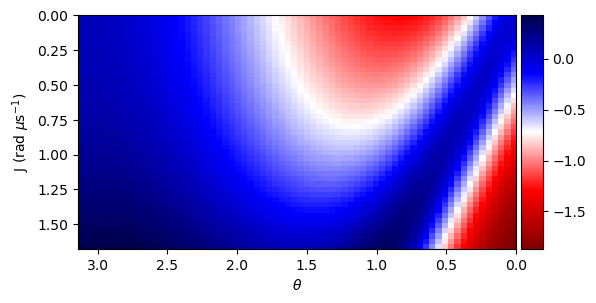

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(dPfn_grid, cmap='seismic_r', interpolation='nearest', extent=[theta_list[0], theta_list[-1], J_list[-1], J_list[0]])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'J (rad $\mu\mathrm{s}^{-1}$)');

## Figure 3b

In [16]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
Delta = 0  # detuning
theta = np.pi / 2

In [17]:
J_list = np.linspace(0, 5, num=45)
phi_list = np.linspace(0, 2 * np.pi, num=70)
t_list = np.linspace(0, 0.5, num=2)
phi_grid, J_grid = np.meshgrid(phi_list, J_list)
dPfn_grid = np.zeros_like(J_grid)

for J_idx, J in enumerate(J_list):
    for phi_idx, phi in enumerate(phi_list):
        # initialize with azimuthal angle phi, in the X-Y plane
        psi0 = np.cos(theta / 2) * basis(2, 0) + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)

        # effective Hamiltonian
        H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])

        out = mesolve(H_eff, psi0, t_list, e_ops=[sigmaz()])
        dPfn_grid[J_idx, phi_idx] = (1 - out.expect[0][0]) - (1 - out.expect[0][-1])

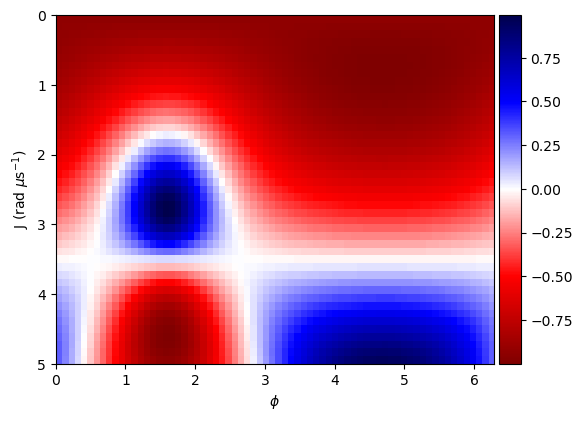

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(dPfn_grid, cmap='seismic_r', interpolation='nearest', extent=[phi_list[0], phi_list[-1], J_list[-1], J_list[0]])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'J (rad $\mu\mathrm{s}^{-1}$)');

## Figure 3c

In [128]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
Delta = 0  # detuning

In [129]:
J_list = np.linspace(0, 30, num=300)
overlap_list = np.zeros_like(J_list)

for J_idx, J in enumerate(J_list):
    # effective Hamiltonian
    H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])
    
    _, (psi_m, psi_p) = H_eff.eigenstates()
    overlap_list[J_idx] = np.abs(psi_p.overlap(psi_m))

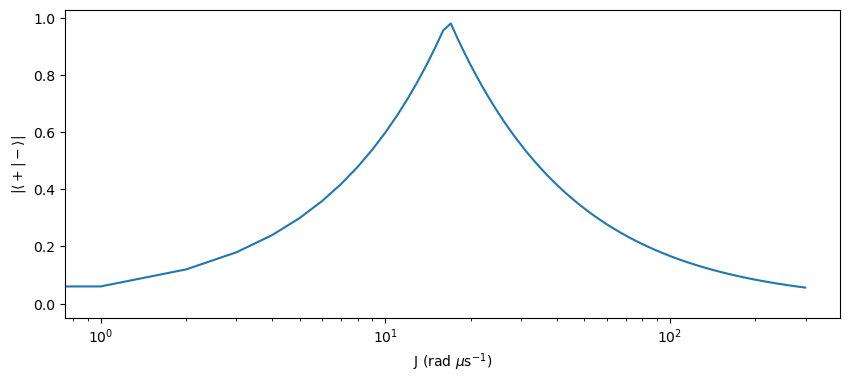

In [131]:
fig, ax = plt.subplots(figsize=(10,4))
ax.semilogx(overlap_list)

ax.set_xlabel(r'J (rad $\mu\mathrm{s}^{-1}$)')
ax.set_ylabel(r'$| \langle + | - \rangle |$');

# Figure 4

## Figure 4a

In [60]:
# constants
gamma_fe = 2
gamma_fg = 0
gamma_eg = 7.1 + gamma_fe
J = 6.9
t_list = np.linspace(0, 2, num=101)

In [61]:
Delta = -2 * 2 * np.pi

psi0 = basis(3, 2)
H = J * Qobj([[0,0,0],[0,0,1],[0,1,0]]) + Delta * Qobj([[0,0,0],[0,1,0],[0,0,0]])
result0 = mesolve(
    H, 
    psi0, 
    t_list, 
    c_ops=[
        np.sqrt(gamma_eg)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), 
        np.sqrt(gamma_fe)*Qobj([[0,0,0],[0,0,1],[0,0,0]]), 
        np.sqrt(gamma_fg)*Qobj([[0,0,0],[0,0,0],[0,0,1]])
    ], 
    e_ops=[
        Qobj([[0,0,0],[0,1,0],[0,0,1]]),
        Qobj([[0,0,0],[0,0,1],[0,1,0]]),
        Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),
        Qobj([[0,0,0],[0,1,0],[0,0,-1]])
    ]
)

In [62]:
Delta = 0 * 2 * np.pi

psi0 = basis(3, 2)
H = J * Qobj([[0,0,0],[0,0,1],[0,1,0]]) + Delta * Qobj([[0,0,0],[0,1,0],[0,0,0]])
result1 = mesolve(
    H, 
    psi0, 
    t_list, 
    c_ops=[
        np.sqrt(gamma_eg)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), 
        np.sqrt(gamma_fe)*Qobj([[0,0,0],[0,0,1],[0,0,0]]), 
        np.sqrt(gamma_fg)*Qobj([[0,0,0],[0,0,0],[0,0,1]])
    ], 
    e_ops=[
        Qobj([[0,0,0],[0,1,0],[0,0,1]]),
        Qobj([[0,0,0],[0,0,1],[0,1,0]]),
        Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),
        Qobj([[0,0,0],[0,1,0],[0,0,-1]])
    ]
)

In [63]:
Delta = 3.5 * 2 * np.pi

psi0 = basis(3, 2)
H = J * Qobj([[0,0,0],[0,0,1],[0,1,0]]) + Delta * Qobj([[0,0,0],[0,1,0],[0,0,0]])
result2 = mesolve(
    H, 
    psi0, 
    t_list, 
    c_ops=[
        np.sqrt(gamma_eg)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), 
        np.sqrt(gamma_fe)*Qobj([[0,0,0],[0,0,1],[0,0,0]]), 
        np.sqrt(gamma_fg)*Qobj([[0,0,0],[0,0,0],[0,0,1]])
    ], 
    e_ops=[
        Qobj([[0,0,0],[0,1,0],[0,0,1]]),
        Qobj([[0,0,0],[0,0,1],[0,1,0]]),
        Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),
        Qobj([[0,0,0],[0,1,0],[0,0,-1]])
    ]
)

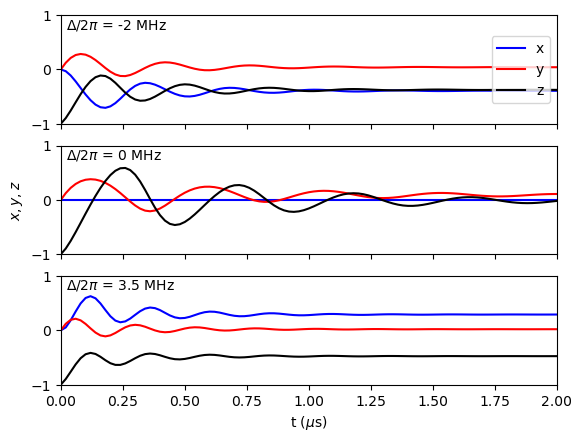

In [80]:
fig, ax = plt.subplots(3)

ax[0].plot(t_list, -result0.expect[1] / result0.expect[0], color='blue', label='x')
ax[0].plot(t_list, result0.expect[2] / result0.expect[0], color='red', label='y')
ax[0].plot(t_list, result0.expect[3] / result0.expect[0], color='black', label='z')

ax[1].plot(t_list, -result1.expect[1] / result1.expect[0], color='blue', label='x')
ax[1].plot(t_list, result1.expect[2] / result1.expect[0], color='red', label='y')
ax[1].plot(t_list, result1.expect[3] / result1.expect[0], color='black', label='z')

ax[2].plot(t_list, -result2.expect[1] / result2.expect[0], color='blue', label='x')
ax[2].plot(t_list, result2.expect[2] / result2.expect[0], color='red', label='y')
ax[2].plot(t_list, result2.expect[3] / result2.expect[0], color='black', label='z')

ax[0].axis([t_list[0], t_list[-1], -1, 1])
ax[1].axis([t_list[0], t_list[-1], -1, 1])
ax[2].axis([t_list[0], t_list[-1], -1, 1])

ax[0].text(0.02, 0.75, r'$\Delta / 2\pi$ = -2 MHz')
ax[1].text(0.02, 0.75, r'$\Delta / 2\pi$ = 0 MHz')
ax[2].text(0.02, 0.75, r'$\Delta / 2\pi$ = 3.5 MHz')
ax[2].set_xlabel(r't ($\mu\mathrm{s}$)')
ax[1].set_ylabel(r'$x, y, z$')
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[0].legend(loc='right');

## Figure 4b

In [81]:
# constants
gamma = 7.1
J = 6.9

In [82]:
Delta = np.linspace(-8, 8, num=1001) * 2 * np.pi
Dlambda_real = np.real(np.sqrt(4 * J**2 + (Delta - 1j * gamma / 2)**2))

Delta = np.linspace(-8, 8, num=1001) * 2 * np.pi
Dlambda_im = np.abs(np.imag(np.sqrt(4 * J**2 + (Delta - 1j * gamma / 2)**2)))

Text(0, 0.5, '$\\Gamma_r$ ($\\mu\\mathrm{s}^{-1}$)')

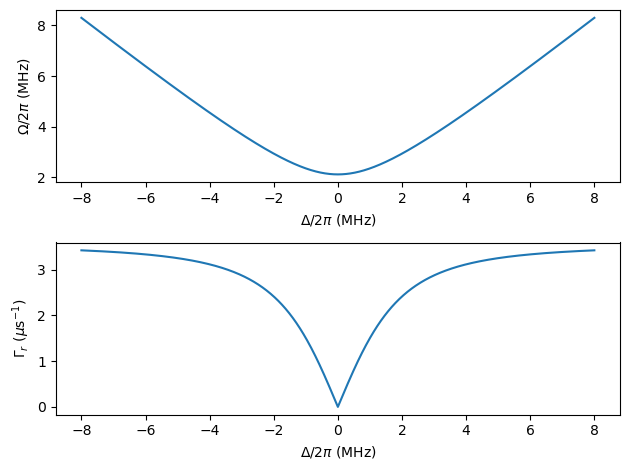

In [94]:
fig, ax = plt.subplots(2)
fig.set_tight_layout(True)

ax[0].plot(Delta / (2 * np.pi), Dlambda_real / (2 * np.pi))
ax[1].plot(Delta / (2 * np.pi), Dlambda_im)

ax[0].set_xlabel(r'$\Delta / 2\pi$ (MHz)')
ax[1].set_xlabel(r'$\Delta / 2\pi$ (MHz)')
ax[0].set_ylabel(r'$\Omega / 2\pi$ (MHz)')
ax[1].set_ylabel(r'$\Gamma_r$ ($\mu\mathrm{s}^{-1}$)');

## Figure 4c

In [19]:
# constants
gamma_fe = 0.1
gamma_eg = 7.1

In [20]:
t_list = np.linspace(0, 4, num=11)
Delta_list = np.linspace(-4, 4, num=51) * 2 * np.pi
J_list = np.linspace(0, 8, num=51)
J_grid, Delta_grid = np.meshgrid(J_list, Delta_list)
X_grid = np.zeros(np.shape(J_grid))
Y_grid = np.zeros(np.shape(J_grid))
Z_grid = np.zeros(np.shape(J_grid))

psi0 = basis(3, 2)

for J_idx, J in enumerate(J_list):
    for Delta_idx, Delta in enumerate(Delta_list):
        H = J * Qobj([[0,0,0],[0,0,1],[0,1,0]]) + Delta * Qobj([[0,0,0],[0,1,0],[0,0,0]])
        
        result = mesolve(
            H, 
            psi0, 
            t_list, 
            c_ops=[
                np.sqrt(gamma_eg) * Qobj([[0,1,0],[0,0,0],[0,0,0]]), 
                np.sqrt(gamma_fe) * Qobj([[0,0,0],[0,0,1],[0,0,0]])
            ], 
            e_ops=[
                Qobj([[0,0,0],[0,1,0],[0,0,1]]),
                Qobj([[0,0,0],[0,0,-1],[0,-1,0]]),
                Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),
                Qobj([[0,0,0],[0,1,0],[0,0,-1]])
            ]
        )
        
        X_grid[Delta_idx][J_idx] = result.expect[1][-1] / result.expect[0][-1]
        Y_grid[Delta_idx][J_idx] = np.real(result.expect[2][-1]) / result.expect[0][-1]
        Z_grid[Delta_idx][J_idx] = result.expect[3][-1] / result.expect[0][-1]

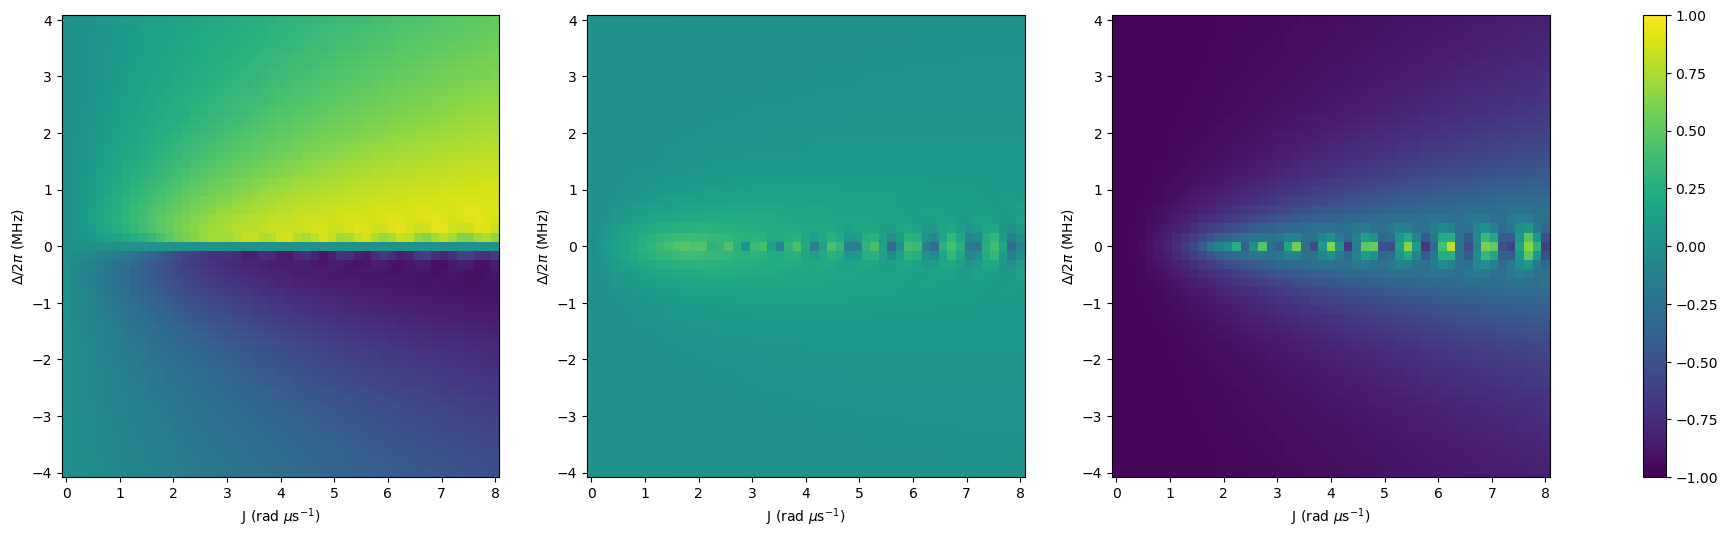

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
im = ax[0].pcolormesh(J_grid, Delta_grid / (2 * np.pi), X_grid, vmin=-1, vmax=1)
ax[1].pcolormesh(J_grid, Delta_grid / (2 * np.pi), Y_grid, vmin=-1, vmax=1)
ax[2].pcolormesh(J_grid, Delta_grid / (2 * np.pi), Z_grid, vmin=-1, vmax=1)

ax[0].set_xlabel(r'J (rad $\mu\mathrm{s}^{-1}$)')
ax[1].set_xlabel(r'J (rad $\mu\mathrm{s}^{-1}$)')
ax[2].set_xlabel(r'J (rad $\mu\mathrm{s}^{-1}$)')
ax[0].set_ylabel(r'$\Delta / 2\pi$ (MHz)')
ax[1].set_ylabel(r'$\Delta / 2\pi$ (MHz)')
ax[2].set_ylabel(r'$\Delta / 2\pi$ (MHz)')

fig.colorbar(im, ax=ax)

## Figure 4d

In [116]:
# constants
gamma_fe = 0
gamma_eg = 7.1

In [117]:
t_list = np.linspace(0, 2, num=11)
J = (gamma_eg - gamma_fe) / 4
Delta_list = np.linspace(-4, 4, num=101) * 2 * np.pi
X_list = np.zeros_like(Delta_list)
Y_list = np.zeros_like(Delta_list)
Z_list = np.zeros_like(Delta_list)

psi0 = basis(3, 2)

for Delta_idx, Delta in enumerate(Delta_list):
    H = J * Qobj([[0,0,0],[0,0,1],[0,1,0]]) + Delta * Qobj([[0,0,0],[0,1,0],[0,0,0]])
    
    result = mesolve(
        H, 
        psi0, 
        t_list, 
        c_ops=[
            np.sqrt(gamma_eg) * Qobj([[0,1,0],[0,0,0],[0,0,0]]), 
            np.sqrt(gamma_fe) * Qobj([[0,0,0],[0,0,1],[0,0,0]])
        ], 
        e_ops=[
            Qobj([[0,0,0],[0,1,0],[0,0,1]]),
            Qobj([[0,0,0],[0,0,-1],[0,-1,0]]),
            Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),
            Qobj([[0,0,0],[0,1,0],[0,0,-1]])
        ]
    )
    
    X_list[Delta_idx] = result.expect[1][-1] / result.expect[0][-1]
    Y_list[Delta_idx] = np.real(result.expect[2][-1]) / result.expect[0][-1]
    Z_list[Delta_idx] = result.expect[3][-1] / result.expect[0][-1]

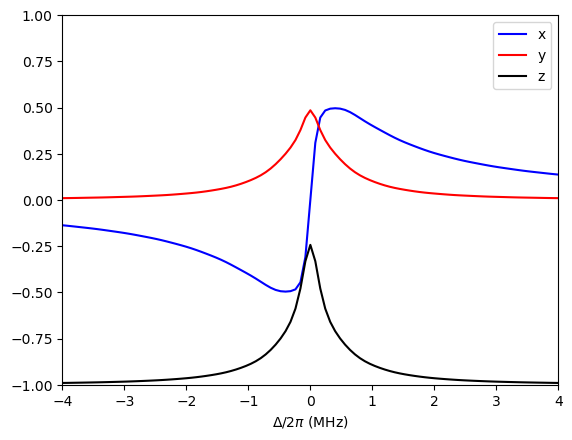

In [119]:
plt.plot(Delta_list / (2 * np.pi), X_list, 'b', label='x')
plt.plot(Delta_list / (2 * np.pi), Y_list, 'r', label='y')
plt.plot(Delta_list / (2 * np.pi), Z_list, 'k', label='z')

plt.axis([Delta_list[0] / (2 * np.pi), Delta_list[-1] / (2 * np.pi), -1, 1])
plt.xlabel(r'$\Delta / 2\pi$ (MHz)')
plt.legend();